# Import All Useful Libs

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import seaborn as sns
from scipy import stats
from  scipy.stats import norm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Read The Data

In [108]:
df_train = pd.read_csv('input/insurance_data.csv')
df_train

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


# Data Cleaning

In [109]:
total = df_train.isnull().sum()
percent = (total / len(df_train)) * 100
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_values)
df_train = df_train.drop('index',axis=1)

               Total   Percent
index              0  0.000000
PatientID          0  0.000000
age                5  0.373134
gender             0  0.000000
bmi                0  0.000000
bloodpressure      0  0.000000
diabetic           0  0.000000
children           0  0.000000
smoker             0  0.000000
region             3  0.223881
claim              0  0.000000


In [110]:
mean_age = np.mean(df_train['age'])
# Fill null values in the 'age' column with the mean age
df_train['age'].fillna(mean_age, inplace=True)

# Check if there are any missing values in the 'age' column after filling
missing_values = df_train['age'].isnull().sum()
print("Missing values in 'age' column after filling:", missing_values)

Missing values in 'age' column after filling: 0


In [111]:
df_train.dropna(subset=['region'],inplace=True)

# Check if there are any missing values in the 'region' column after droping
missing_values = df_train['region'].isnull().sum()
print("Missing values in 'region' column after filling:", missing_values)

Missing values in 'region' column after filling: 0


In [112]:
df_train.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,671.970830,38.086308,30.672924,94.169035,1.095737,13279.668295
std,386.153126,11.091990,6.112768,11.438582,1.205571,12109.827623
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,338.000000,29.000000,26.200000,86.000000,0.000000,4746.340000
50%,672.000000,38.000000,30.400000,92.000000,1.000000,9386.160000
75%,1006.000000,47.000000,34.700000,99.000000,2.000000,16657.720000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [113]:
# Create dummy variables for the 'region' variable
region_dummies = pd.get_dummies(df_train['region'], prefix='region', drop_first=True)

# Encode the 'smoker' variable (0 for 'No' and 1 for 'Yes')
df_train['smoker'] = df_train['smoker'].map({'No': 0, 'Yes': 1})

# Show the first few rows of the encoded variables
region_dummies.head(), df_train[['smoker']].head()

(   region_northwest  region_southeast  region_southwest
 0             False              True             False
 1             False              True             False
 2             False              True             False
 3              True             False             False
 4              True             False             False,
    smoker
 0       0
 1       0
 2       0
 3       0
 4       0)

# Column Types

Numerical : Patient ID, Age, BMI, Bloodpressure, Children, Claim
Categorical : Gender, Diabetic, Smoker, Region

In [114]:
df_train.sample(5)

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
66,67,27.0,female,29.8,100,No,0,0,southwest,1744.47
40,41,29.0,female,40.3,94,No,0,0,southeast,1634.57
1073,1074,46.0,female,25.6,100,Yes,1,1,northeast,20296.86
861,862,44.0,female,27.5,86,Yes,0,0,southwest,12233.83
943,944,35.0,female,31.8,95,No,0,0,southwest,13880.95


# Univariate Analysis

##### Conclusion: 
    - Age has 5 missing values
    - Data has two peaks and skewness of 0.11 so data is distributed biomodaly which means two age groups have claimed insurance most so one new column can be added to identify these age groups
    - There are no outliers
    - Max age is recorded 60 and mean age is 38 which shows very old people have not been insured

In [115]:
df_train['age'].describe()

count    1337.000000
mean       38.086308
std        11.091990
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

/Users/dwioktariana/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


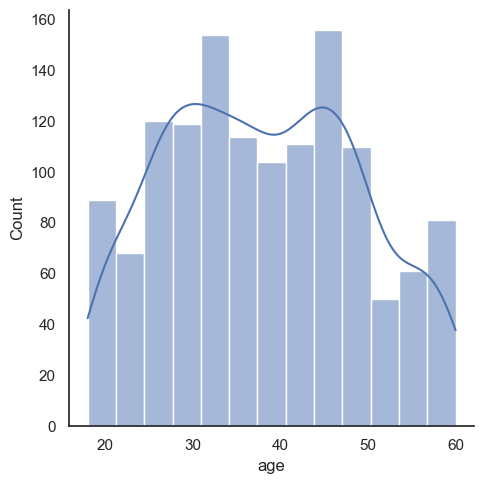

In [116]:
sns.displot(df_train['age'],kde=True)

<Axes: ylabel='Density'>

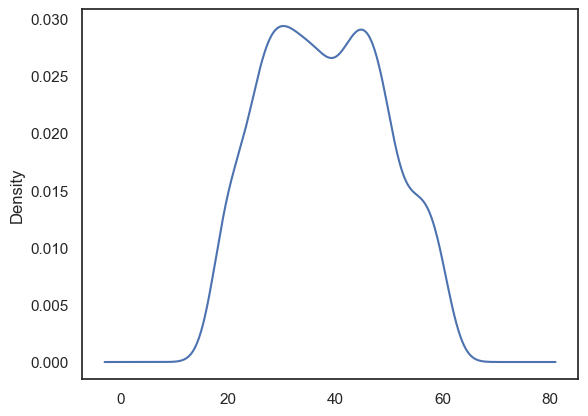

In [117]:
df_train['age'].plot(kind='kde')

In [118]:
print('skewness in age is ' ,df_train['age'].skew())

skewness in age is  0.11194591001235128


<Axes: >

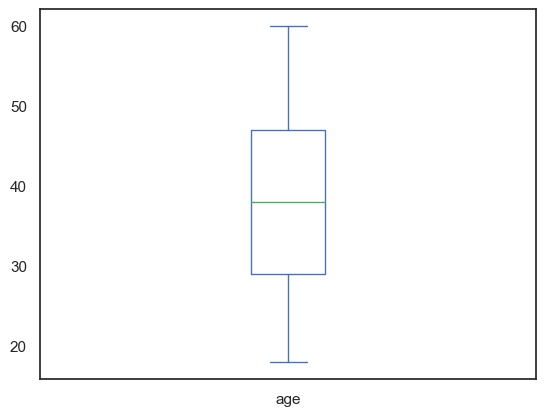

In [119]:
df_train['age'].plot(kind='box')

###### BMI

##### Conclusion :
    - Distribution is perfectly normal
    - Skewness is very minimal
    - Boxplot indicated some serious outlier, BMI above 50 shows very obese and its fatal

/var/folders/v7/jw3pdc8s13bdb106bhrvzm7c0000gn/T/ipykernel_32513/2163789744.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

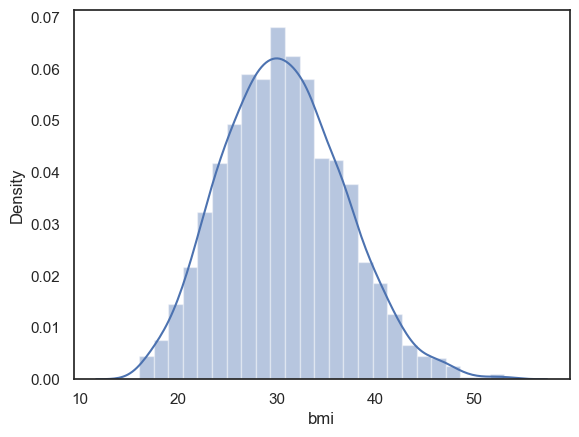

In [120]:
sns.distplot(df_train['bmi'])

In [121]:
df_train['bmi'].describe()

count    1337.000000
mean       30.672924
std         6.112768
min        16.000000
25%        26.200000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<Axes: ylabel='Density'>

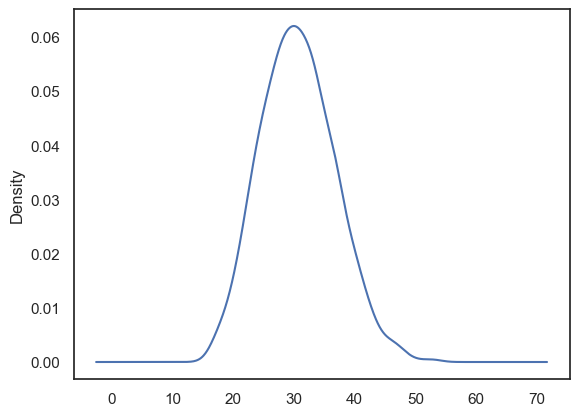

In [122]:
df_train['bmi'].plot(kind='kde')

In [123]:
df_train['bmi'].skew()

0.28393685213280595

<Axes: >

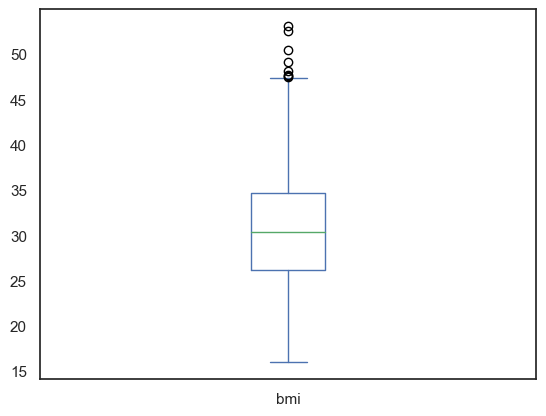

In [124]:
df_train['bmi'].plot(kind='box')

In [125]:
df_train[df_train['bmi']>35].count()

PatientID        317
age              317
gender           317
bmi              317
bloodpressure    317
diabetic         317
children         317
smoker           317
region           317
claim            317
dtype: int64

###### Conclusion:
    1. Data is highly positively skewed with skewness of 1.48
    2. Boxplot shows some serious outliers which is cause of positive skewness
    3. BP higher than 120 is counted 55, so 55 people due to BP shootup

/var/folders/v7/jw3pdc8s13bdb106bhrvzm7c0000gn/T/ipykernel_32513/2871198053.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['bloodpressure'])


<Axes: xlabel='bloodpressure', ylabel='Density'>

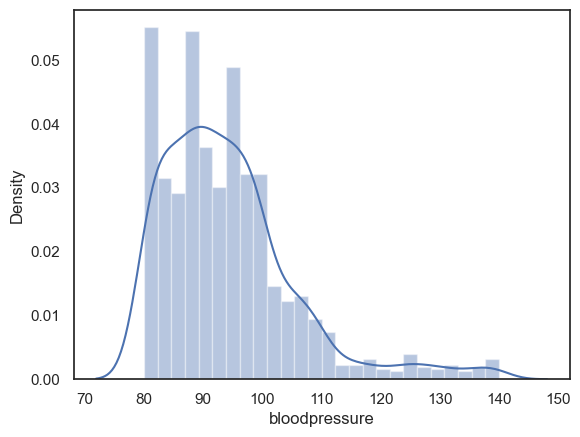

In [126]:
sns.distplot(df_train['bloodpressure'])

In [127]:
df_train['bloodpressure'].skew()

1.4836348354148527

<Axes: ylabel='Density'>

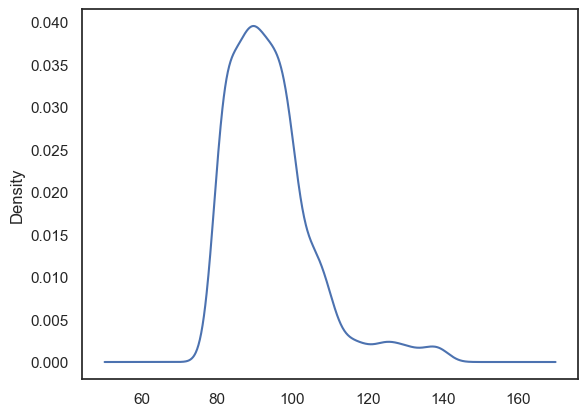

In [128]:
df_train['bloodpressure'].plot(kind='kde')

<Axes: ylabel='Frequency'>

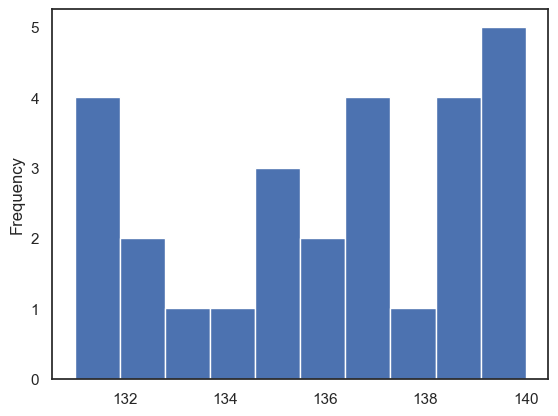

In [129]:
col=df_train[df_train['bloodpressure']>130]
col['bloodpressure'].plot(kind='hist')

In [130]:
df_train['bloodpressure'].describe()

count    1337.000000
mean       94.169035
std        11.438582
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

<Axes: >

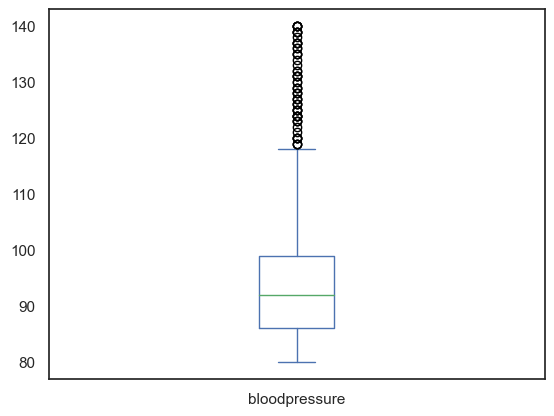

In [131]:
df_train['bloodpressure'].plot(kind='box')

In [132]:
df_train[df_train['bloodpressure']<120]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.000000,male,23.2,91,Yes,0,0,southeast,1121.87
1,2,24.000000,male,30.1,87,No,0,0,southeast,1131.51
2,3,38.078652,male,33.3,82,Yes,0,0,southeast,1135.94
3,4,38.078652,male,33.7,80,No,0,0,northwest,1136.40
4,5,38.078652,male,34.1,100,No,0,0,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1331,1332,18.000000,male,41.1,104,No,1,1,southeast,48970.25
1335,1336,44.000000,female,35.5,88,Yes,0,1,northwest,55135.40
1337,1338,30.000000,male,34.5,91,Yes,3,1,northwest,60021.40
1338,1339,37.000000,male,30.4,106,No,0,1,southeast,62592.87


In [133]:
df_train[df_train['bloodpressure']<120].count()

PatientID        1278
age              1278
gender           1278
bmi              1278
bloodpressure    1278
diabetic         1278
children         1278
smoker           1278
region           1278
claim            1278
dtype: int64

/Users/dwioktariana/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


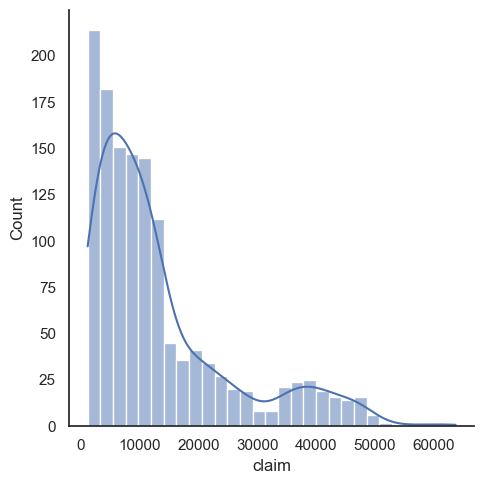

In [134]:
sns.displot(df_train['claim'],kde=True)
plt.show()

<Axes: ylabel='Density'>

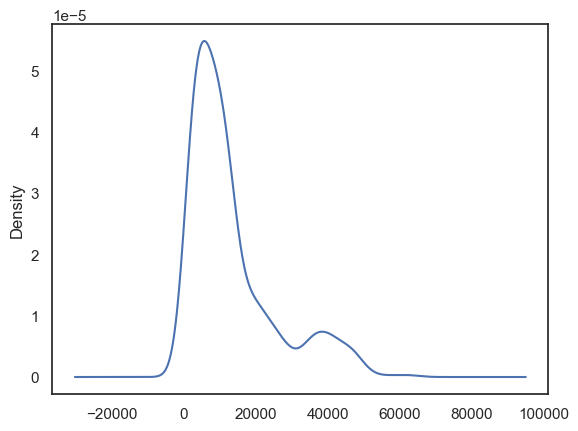

In [135]:
df_train['claim'].plot(kind='kde')

In [136]:
df_train['claim'].skew()

1.5155834070803003

In [137]:
df_train['claim'].describe()

count     1337.000000
mean     13279.668295
std      12109.827623
min       1121.870000
25%       4746.340000
50%       9386.160000
75%      16657.720000
max      63770.430000
Name: claim, dtype: float64

<Axes: >

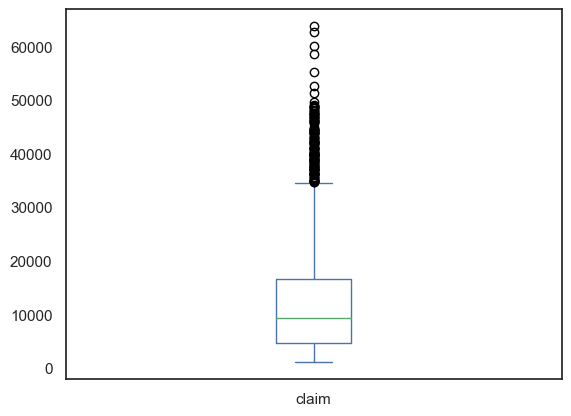

In [138]:
df_train['claim'].plot(kind='box')

In [139]:
df_train[df_train['claim']>30000].count()

PatientID        162
age              162
gender           162
bmi              162
bloodpressure    162
diabetic         162
children         162
smoker           162
region           162
claim            162
dtype: int64

In [140]:
df_train[df_train['claim']<30000].count()

PatientID        1175
age              1175
gender           1175
bmi              1175
bloodpressure    1175
diabetic         1175
children         1175
smoker           1175
region           1175
claim            1175
dtype: int64

In [141]:
stats.iqr(df_train['claim'])

11911.380000000001

### Gender

###### Conclusion:
    1. Male and Female are almost in same quantity

In [142]:
df_train['gender'].value_counts()

gender
male      675
female    662
Name: count, dtype: int64

<Axes: xlabel='gender'>

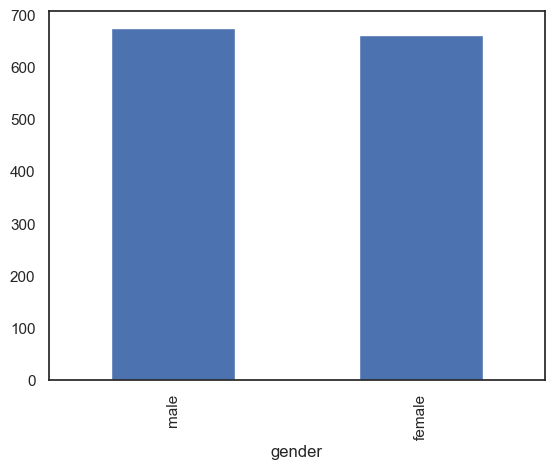

In [143]:
df_train['gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

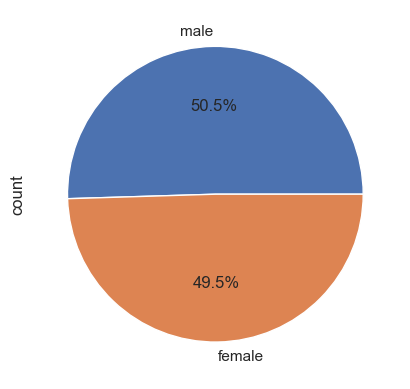

In [144]:
df_train['gender'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [145]:
df_train['gender'].isnull().sum()

0

In [146]:
df_train.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.000000,male,23.2,91,Yes,0,0,southeast,1121.87
1,2,24.000000,male,30.1,87,No,0,0,southeast,1131.51
2,3,38.078652,male,33.3,82,Yes,0,0,southeast,1135.94
3,4,38.078652,male,33.7,80,No,0,0,northwest,1136.40
4,5,38.078652,male,34.1,100,No,0,0,northwest,1137.01


### Diabetic

###### Conclusion:
    1. Most patients are non diabetic but there is no more difference

In [147]:
df_train['diabetic'].value_counts()

diabetic
No     697
Yes    640
Name: count, dtype: int64

<Axes: xlabel='diabetic'>

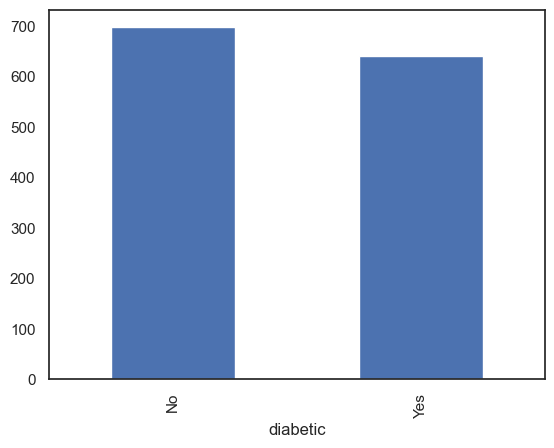

In [148]:
df_train['diabetic'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

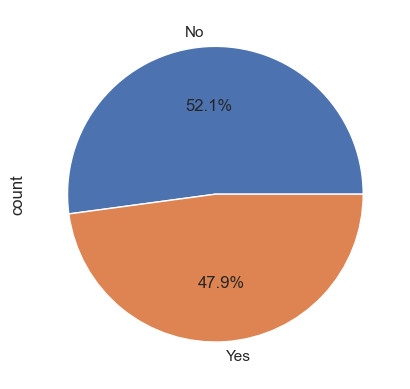

In [149]:
df_train['diabetic'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Children

###### Conclusion:
    1. Most people are children less and number of children is increasing up to 5

In [150]:
df_train['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: xlabel='children'>

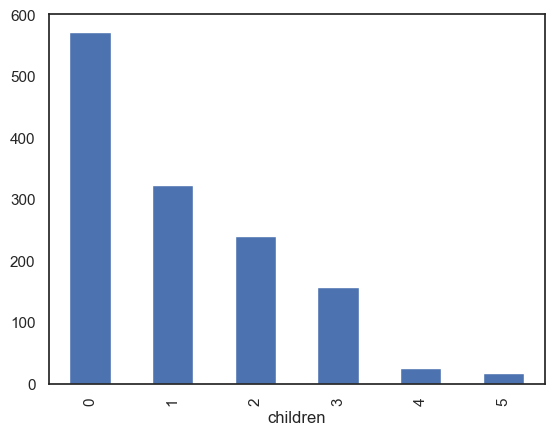

In [151]:
df_train['children'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

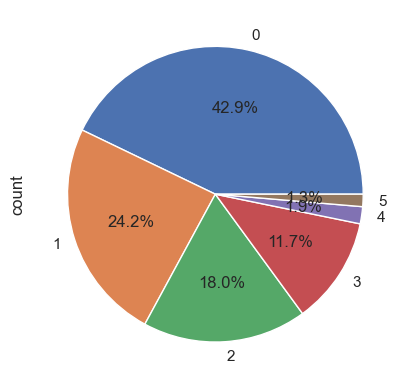

In [152]:
df_train['children'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Smoker

###### Conclusion : 80% persons are not smokers

In [153]:
df_train['smoker'].value_counts()

smoker
0    1063
1     274
Name: count, dtype: int64

<Axes: xlabel='smoker'>

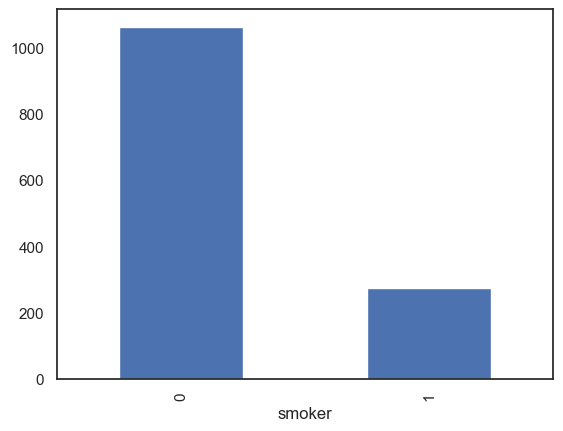

In [154]:
df_train['smoker'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

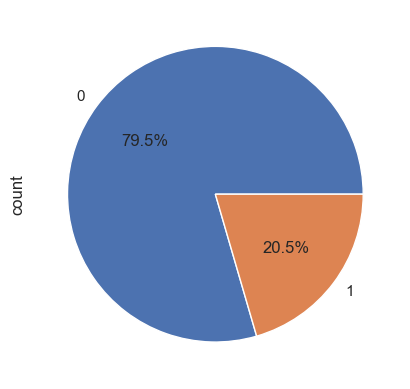

In [155]:
df_train['smoker'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Region

###### Conclusion:
    The most people are coming from:
        a. Southeast
        b. Northwest
        c. Southwest
        d. Northwest

In [156]:
df_train['region'].value_counts()

region
southeast    443
northwest    349
southwest    314
northeast    231
Name: count, dtype: int64

<Axes: xlabel='region'>

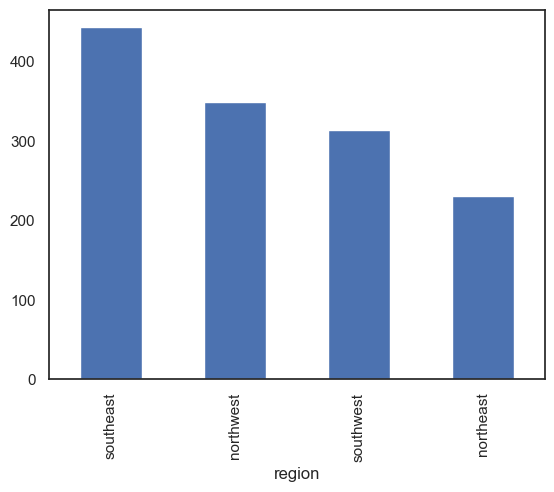

In [157]:
df_train['region'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

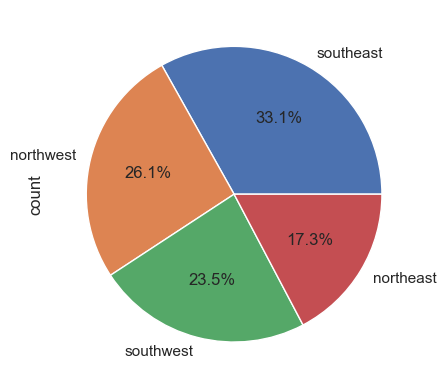

In [158]:
df_train['region'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [159]:
df_train.sample(5)

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
697,698,53.0,female,30.8,105,No,1,0,northeast,9778.35
434,435,42.0,male,34.7,97,Yes,2,0,southwest,6082.41
819,820,42.0,female,28.3,85,No,0,0,northeast,11657.72
806,807,59.0,female,36.4,91,No,3,0,northwest,11436.74
115,116,26.0,female,26.3,87,Yes,0,0,southeast,2198.19


### Scatterplot Analysis

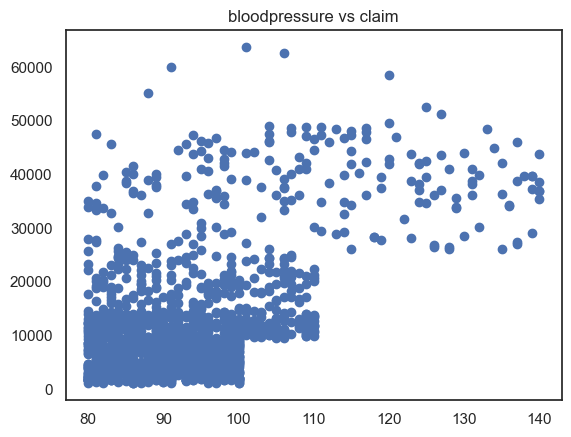

In [160]:
plt.scatter(df_train['bloodpressure'],df_train['claim'])
plt.title('bloodpressure vs claim')
plt.show()

In [161]:
correlation = df_train['claim'].corr(df_train['bloodpressure'])
correlation

0.5313390300990163

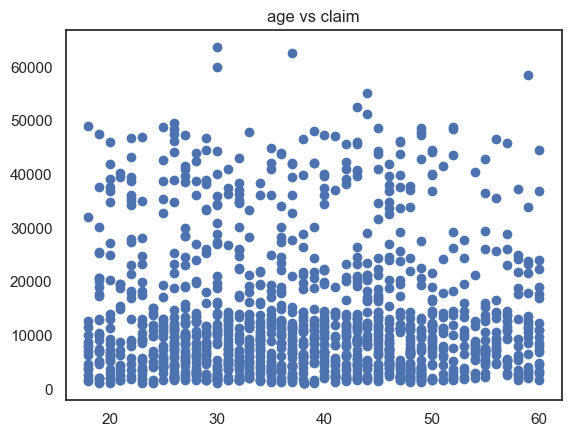

In [162]:
plt.scatter(df_train['age'],df_train['claim'])
plt.title('age vs claim')
plt.show()

In [163]:
correlation = df_train['claim'].corr(df_train['age'])
correlation

-0.028579665479836737

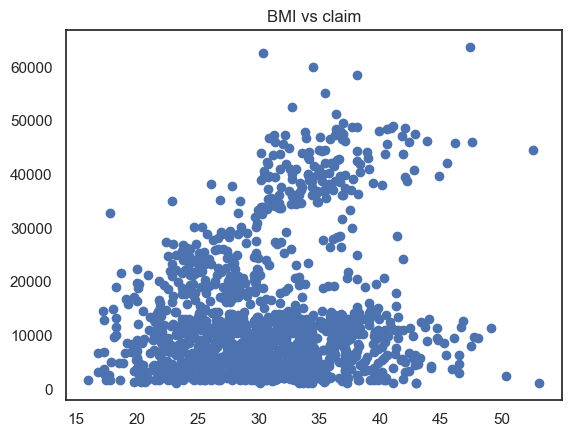

In [164]:
plt.scatter(df_train['bmi'],df_train['claim'])
plt.title('BMI vs claim')
plt.show()

In [165]:
correlation = df_train['claim'].corr(df_train['bmi'])
correlation

0.19700043192215563

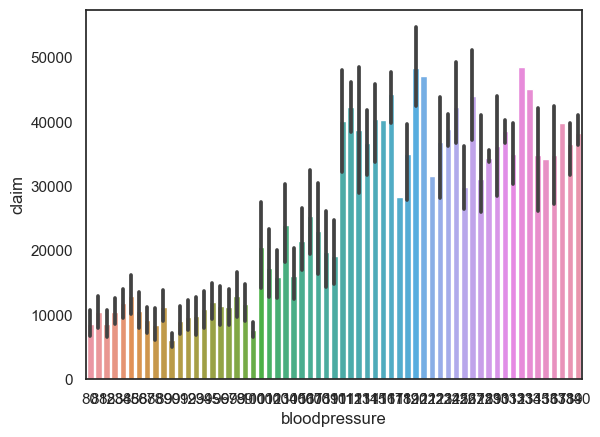

In [166]:
sns.barplot(x=df_train['bloodpressure'],y=df_train['claim'])
plt.xlabel('bloodpressure')
plt.ylabel('claim')
plt.show()

### LinearRegression Test

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [168]:
df_train

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.000000,male,23.2,91,Yes,0,0,southeast,1121.87
1,2,24.000000,male,30.1,87,No,0,0,southeast,1131.51
2,3,38.078652,male,33.3,82,Yes,0,0,southeast,1135.94
3,4,38.078652,male,33.7,80,No,0,0,northwest,1136.40
4,5,38.078652,male,34.1,100,No,0,0,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.000000,female,35.5,88,Yes,0,1,northwest,55135.40
1336,1337,59.000000,female,38.1,120,No,1,1,northeast,58571.07
1337,1338,30.000000,male,34.5,91,Yes,3,1,northwest,60021.40
1338,1339,37.000000,male,30.4,106,No,0,1,southeast,62592.87


In [169]:
region_dummies = pd.get_dummies(df_train['region'])

df_train = pd.concat([df_train.drop('region', axis=1), region_dummies], axis=1)

df_train = df_train.drop(columns =['age', 'gender', 'diabetic', 'children', 'PatientID'])

# Encode smoker column 1 = Yes, 0 = No
label_encoder = LabelEncoder()
categorical_columns = ['smoker', 'northeast', 'northwest', 'southeast', 'southwest']
for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])


In [170]:
df_train

,bmi,bloodpressure,smoker,claim,northeast,northwest,southeast,southwest
0,23.2,91,0,1121.87,0,0,1,0
1,30.1,87,0,1131.51,0,0,1,0
2,33.3,82,0,1135.94,0,0,1,0
3,33.7,80,0,1136.40,0,1,0,0
4,34.1,100,0,1137.01,0,1,0,0
...,...,...,...,...,...,...,...,...
1335,35.5,88,1,55135.40,0,1,0,0
1336,38.1,120,1,58571.07,1,0,0,0
1337,34.5,91,1,60021.40,0,1,0,0
1338,30.4,106,1,62592.87,0,0,1,0


### Correlation Coefficient & Linearity


Mean Squared Error (MSE): 43492851.68

Model Coefficients:
bmi: 309.53
bloodpressure: 255.32
smoker: 19416.82
northeast: 1235.60
northwest: -75.55
southeast: -622.11
southwest: -537.95

Intercept: -24244.49


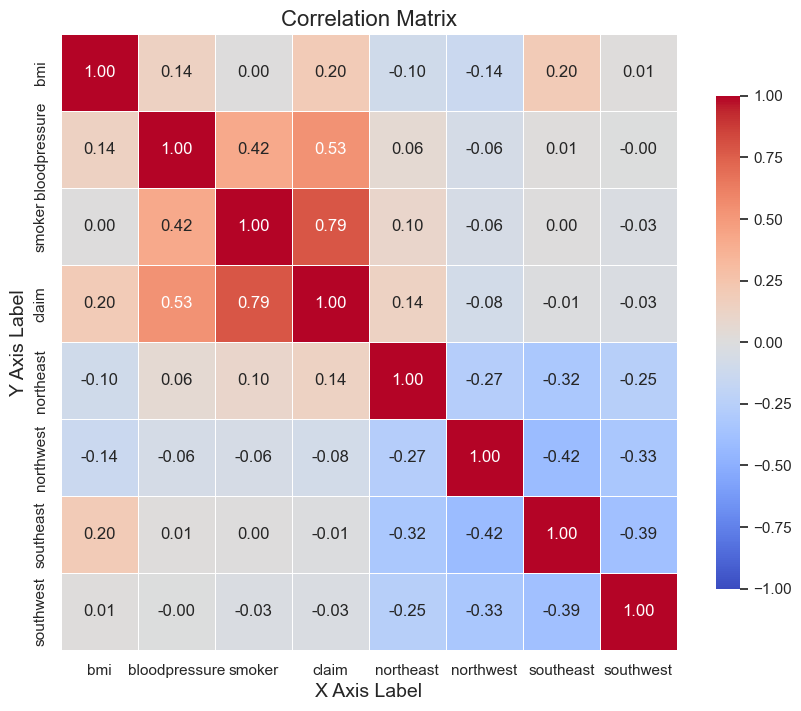

In [171]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Separate features (X) and target variable (y)
X = df_train.drop(columns=['claim'])  # Drop patientID and claim columns for features
y = df_train['claim']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate mean squared error to evaluate the model
mse = mean_squared_error(y_test, predictions)

# Print beautified output
print("\nMean Squared Error (MSE): {:.2f}".format(mse))
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print("{}: {:.2f}".format(feature, coef))
print("\nIntercept: {:.2f}".format(model.intercept_))

# Set the style of the heatmap
sns.set(style="white")  

# Create a figure and a set of subplots
plt.figure(figsize=(10, 8))

# Define your correlation matrix (assuming you have it defined somewhere in your code)
corr_matrix = df_train.corr()

# Customize the heatmap appearance
sns.heatmap(corr_matrix,
            annot=True,  # Annotate each cell with the numeric value
            cmap="coolwarm",  # Set the color map (you can choose any color map you prefer)
            fmt=".2f",  # Format the annotations to two decimal places
            linewidths=.5,  # Width of the lines that divide each cell
            vmin=-1,  # Set the minimum value of the color scale
            vmax=1,   # Set the maximum value of the color scale
            square=True,  # Make the cells square-shaped
            cbar_kws={"shrink": 0.8},  # Shrink the color bar size for better visibility
            annot_kws={"size": 12}  # Set the font size of the annotations
           )

# Set the title and labels for the axes
plt.title("Correlation Matrix", fontsize=16)
plt.xlabel("X Axis Label", fontsize=14)  # Replace "X Axis Label" with your actual x-axis label
plt.ylabel("Y Axis Label", fontsize=14)  # Replace "Y Axis Label" with your actual y-axis label

# Display the heatmap
plt.show()


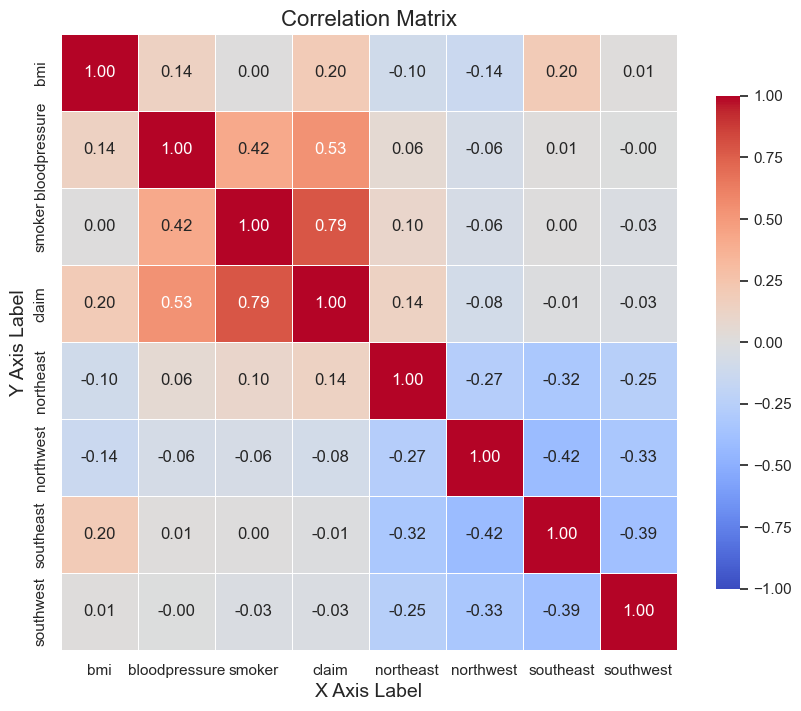

In [172]:
# Set the style of the heatmap
sns.set(style="white")  

# Create a figure and a set of subplots
plt.figure(figsize=(10, 8))

# Define your correlation matrix (assuming you have it defined somewhere in your code)
corr_matrix = df_train.corr()

# Customize the heatmap appearance
sns.heatmap(corr_matrix,
            annot=True,  # Annotate each cell with the numeric value
            cmap="coolwarm",  # Set the color map (you can choose any color map you prefer)
            fmt=".2f",  # Format the annotations to two decimal places
            linewidths=.5,  # Width of the lines that divide each cell
            vmin=-1,  # Set the minimum value of the color scale
            vmax=1,   # Set the maximum value of the color scale
            square=True,  # Make the cells square-shaped
            cbar_kws={"shrink": 0.8},  # Shrink the color bar size for better visibility
            annot_kws={"size": 12}  # Set the font size of the annotations
           )

# Set the title and labels for the axes
plt.title("Correlation Matrix", fontsize=16)
plt.xlabel("X Axis Label", fontsize=14)  # Replace "X Axis Label" with your actual x-axis label
plt.ylabel("Y Axis Label", fontsize=14)  # Replace "Y Axis Label" with your actual y-axis label

# Display the heatmap
plt.show()


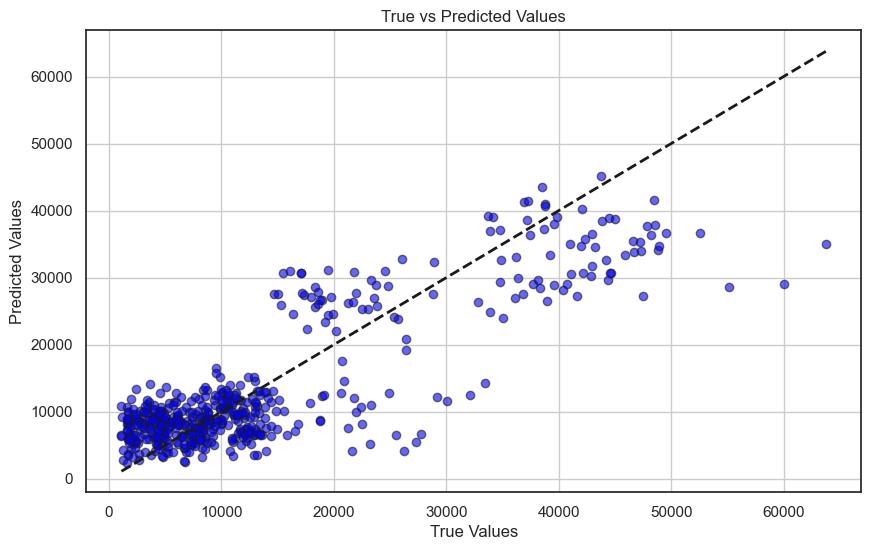

In [173]:
# Scatter plot for true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', edgecolors='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.grid(True)
plt.show()

## Data Transformation
Due to the suggestion above, doing the Data Transformation for stabilizing the variance and make the data more suitable for linear regression

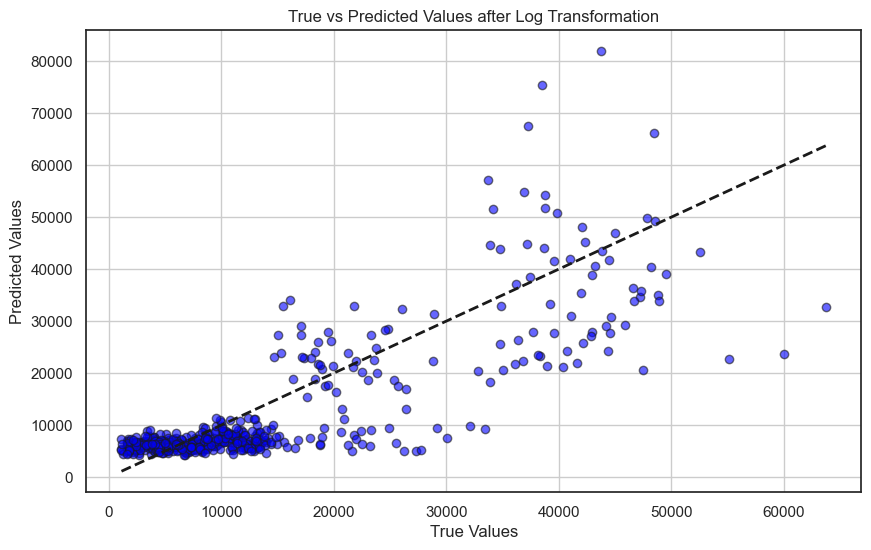

In [174]:

# Separate features (X) and target variable (y)
X = df_train.drop(columns=['claim'])  # Drop claim columns for features
y = np.log1p(df_train['claim'])  # Apply log transformation using log(1+x) to avoid log(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Revert log-transformed predictions to original scale for plotting
original_y_test = np.expm1(y_test)
original_predictions = np.expm1(predictions)

# Calculate mean squared error to evaluate the model
mse = mean_squared_error(original_y_test, original_predictions)

# Calculate R-squared
r_squared = r2_score(original_y_test, original_predictions)  # Calculate R-squared

# Scatter plot for true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(original_y_test, original_predictions, color='blue', edgecolors='k', alpha=0.6)
plt.plot([original_y_test.min(), original_y_test.max()], [original_y_test.min(), original_y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values after Log Transformation')
plt.grid(True)
plt.show()


In [175]:
# Print beautified output
print("\nR Squared value: {:.2f}".format(r_squared))
print("Mean Squared Error (MSE) after log transformation: {:.2f}".format(mse))
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print("{}: {:.2f}".format(feature, coef))
print("\nIntercept: {:.2f}".format(model.intercept_))


R Squared value: 0.63
Mean Squared Error (MSE) after log transformation: 58447306.84

Model Coefficients:
bmi: 0.02
bloodpressure: 0.02
smoker: 1.27
northeast: 0.19
northwest: -0.05
southeast: -0.11
southwest: -0.03

Intercept: 6.67


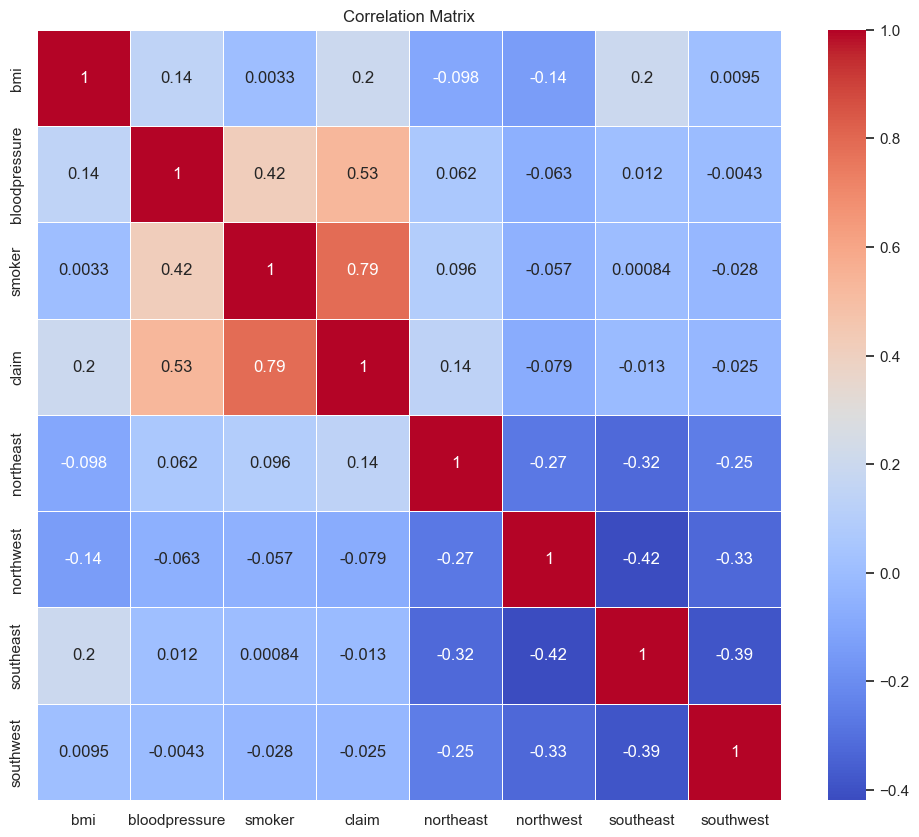

In [176]:
# Print the correlation matrix
corr_matrix = df_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Independence
Using the Durbin-Watsons statistics

In [177]:
df_train

,bmi,bloodpressure,smoker,claim,northeast,northwest,southeast,southwest
0,23.2,91,0,1121.87,0,0,1,0
1,30.1,87,0,1131.51,0,0,1,0
2,33.3,82,0,1135.94,0,0,1,0
3,33.7,80,0,1136.40,0,1,0,0
4,34.1,100,0,1137.01,0,1,0,0
...,...,...,...,...,...,...,...,...
1335,35.5,88,1,55135.40,0,1,0,0
1336,38.1,120,1,58571.07,1,0,0,0
1337,34.5,91,1,60021.40,0,1,0,0
1338,30.4,106,1,62592.87,0,0,1,0


In [178]:
from statsmodels.stats.stattools import durbin_watson

# Log transformation of the target variable
df_train['claim'] = np.log(df_train['claim'])

# Selecting features and target
X = df_train.drop(columns=['claim'])  # Drop patientID and claim columns for features
y = df_train['claim']

# Handling categorical variables (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the charges
y_pred = model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

# Calculate Durbin-Watson statistic
dw_statistic = durbin_watson(residuals)

print(f'Durbin-Watson Statistic: {dw_statistic}')

Durbin-Watson Statistic: 2.277482092895923


#### The Explanation
The Durbin-Watson statistic value of \(1.8686354311882818\) is close to 2, which is the ideal value suggesting no autocorrelation.

In more detail:

- A Durbin-Watson statistic value close to 2 suggests that there is no first-order linear autocorrelation in the residuals.
- A value between 0 and 2 indicates positive autocorrelation (i.e., the presence of a systematic pattern where a positive error for one observation increases the chance of a positive error for another observation).
- A value between 2 and 4 indicates negative autocorrelation (i.e., a positive error for one observation increases the chance of a negative error for another observation).

In your case, the Durbin-Watson statistic value of \(1.8686354311882818\) is very close to 2, indicating that the residuals from your regression model have little to no first-order linear autocorrelation. This is a good indication as it means the assumption of independent errors is nearly met, making the linear regression model more trustworthy.

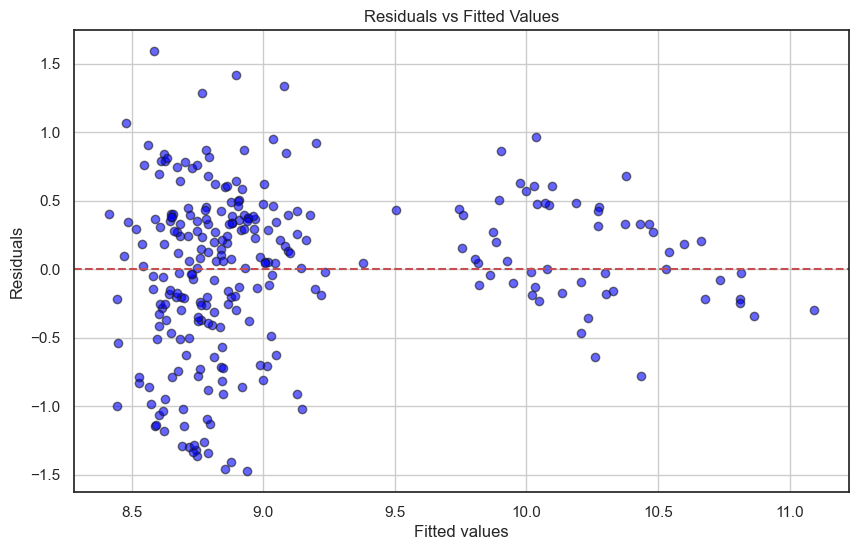

In [179]:
# Plot residuals against fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolors='k', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True)
plt.show()

# Normality

### Chi-Square

In [180]:
import pandas as pd
from scipy.stats import chisquare

# Assuming df_train has been loaded already

variables_to_test = df_train
for var in variables_to_test:
    observed_values = df_train[var].value_counts().sort_index().values
    num_unique_values = len(df_train[var].unique())
    expected_values = [len(df_train) / num_unique_values] * num_unique_values
    if len(observed_values) == len(expected_values):  # Ensure lengths match before testing
        chi2, p = chisquare(observed_values, expected_values)
        print(f'Variable: {var}')
        print(f'Chi-Square: {chi2}')
        print(f'P-value: {p}')
        print('---' * 10)
    else:
        print(f"Skipped {var} due to shape mismatch between observed and expected values.")


Variable: bmi
Chi-Square: 680.1465968586386
P-value: 1.81523541300179e-36
------------------------------
Variable: bloodpressure
Chi-Square: 1376.7928197456993
P-value: 2.527443522489657e-248
------------------------------
Variable: smoker
Chi-Square: 465.6103216155572
P-value: 2.890708357100532e-103
------------------------------
Variable: claim
Chi-Square: 2.986537023186238
P-value: 1.0
------------------------------
Variable: northeast
Chi-Square: 572.6439790575917
P-value: 1.4934218210959947e-126
------------------------------
Variable: northwest
Chi-Square: 305.40089753178756
P-value: 2.193471690531348e-68
------------------------------
Variable: southeast
Chi-Square: 152.13238593866865
P-value: 5.927780325794022e-35
------------------------------
Variable: southwest
Chi-Square: 375.97681376215405
P-value: 9.351563598348689e-84
------------------------------


### Q-Q plot of standardized residuals

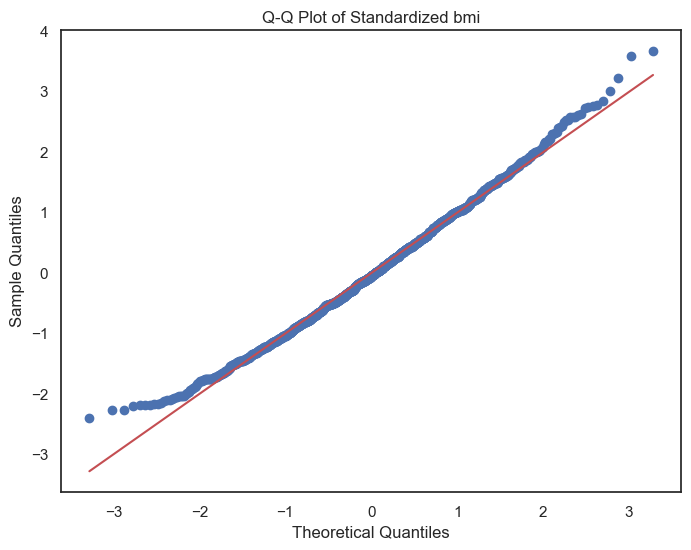

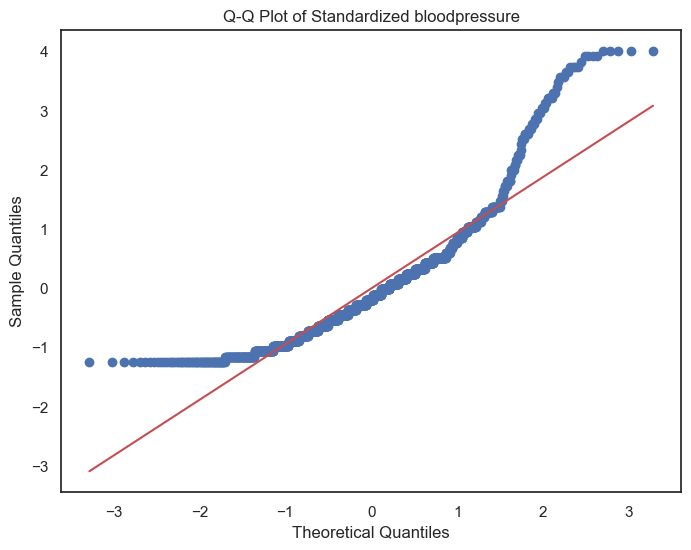

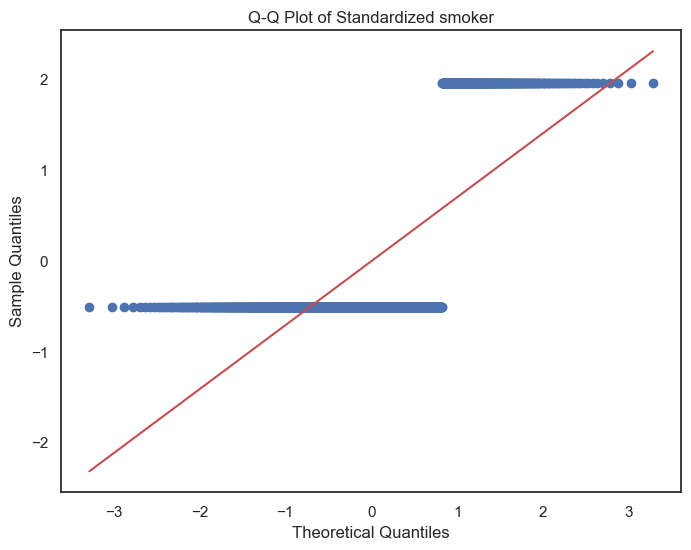

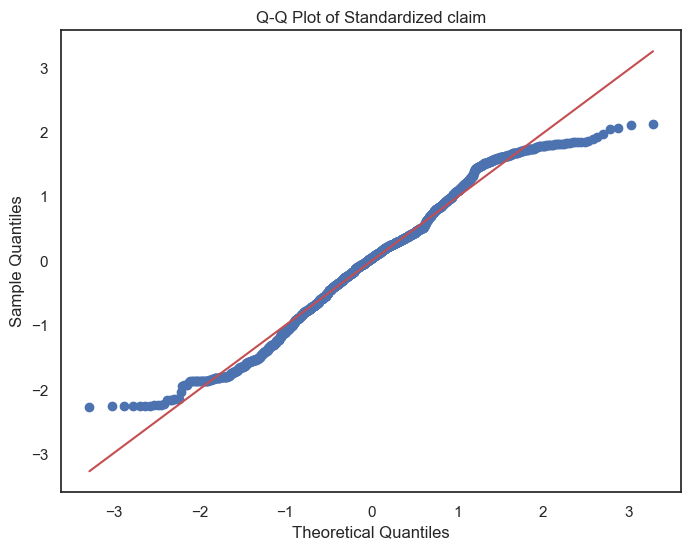

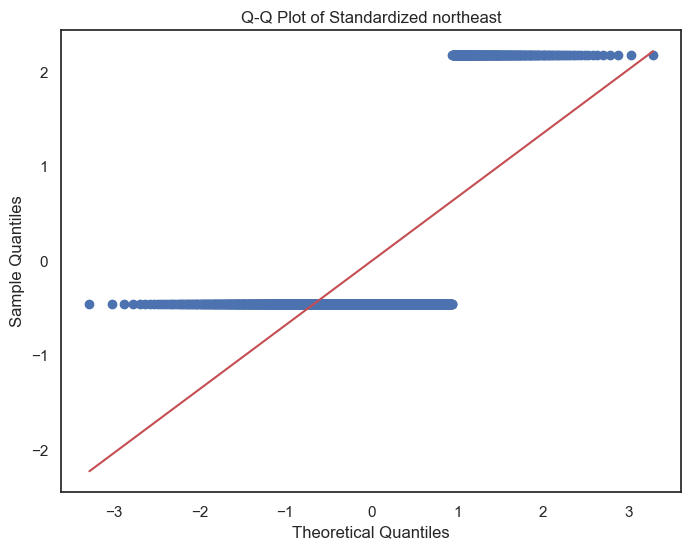

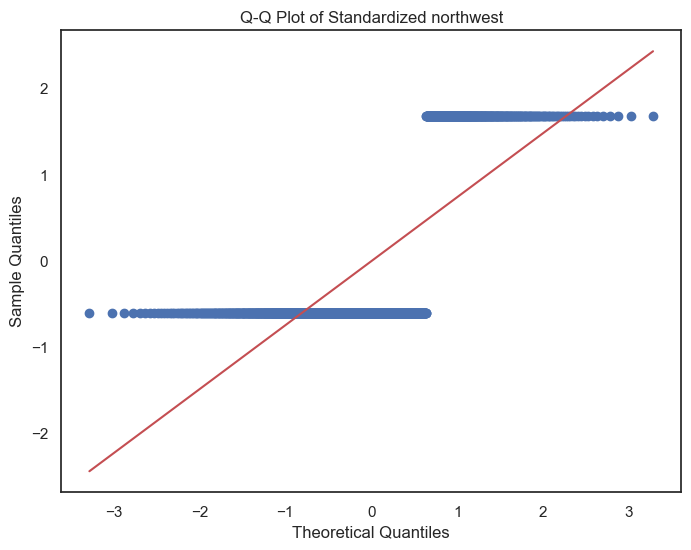

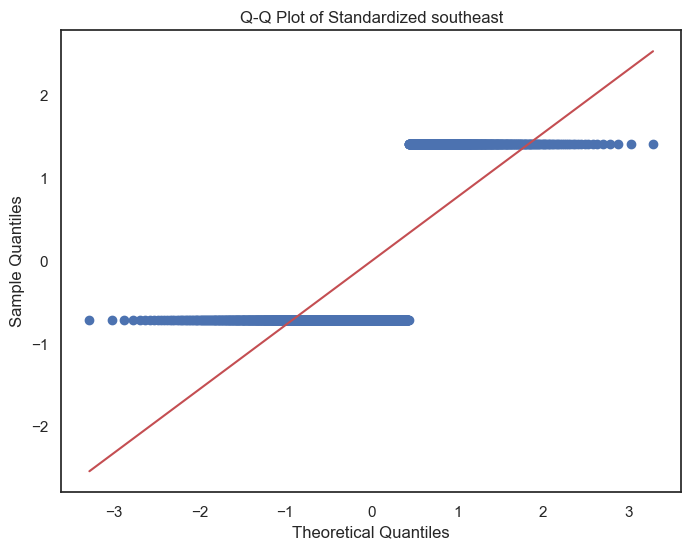

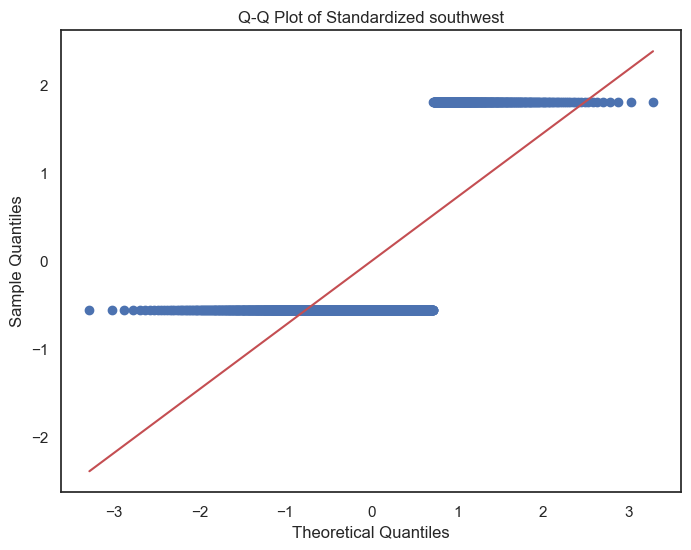

In [181]:
from scipy.stats import probplot

variables = df_train
for var in variables:
    # Standardize the column values
    standardized_values = (df_train[var] - np.mean(df_train[var])) / np.std(df_train[var])
    
    # Create Q-Q plot
    plt.figure(figsize=(8, 6))
    probplot(standardized_values, dist='norm', plot=plt)
    plt.title(f"Q-Q Plot of Standardized {var}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.show()


# Residual Homoscedasticity

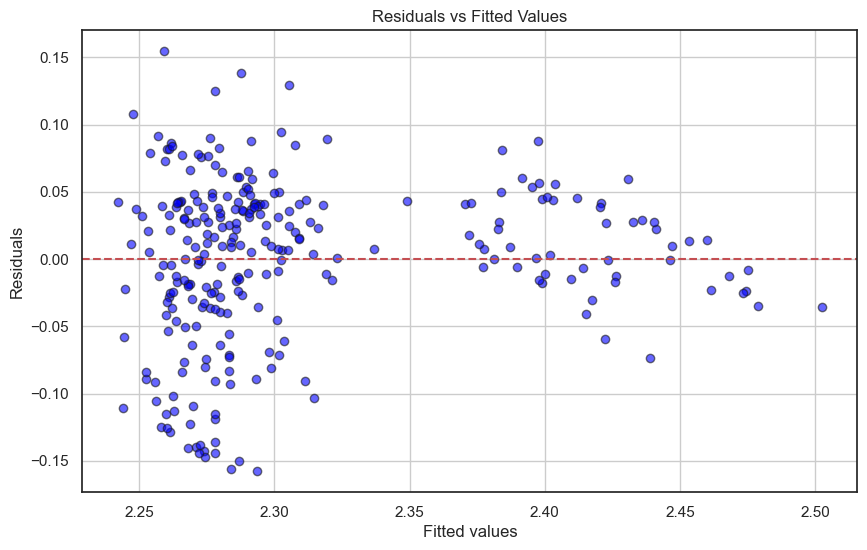

In [182]:
# Separate features (X) and target variable (y)
X = df_train.drop(columns=['claim'])  # Drop patientID and claim columns for features
y = np.log1p(df_train['claim'])  # Apply log transformation using log(1+x) to avoid log(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Revert log-transformed predictions to original scale for plotting
original_y_test = np.expm1(y_test)
original_predictions = np.expm1(predictions)

# Calculate mean squared error to evaluate the model
mse = mean_squared_error(original_y_test, original_predictions)

# Calculate residuals
residuals = y_test - predictions

# Plot residuals against fitted values
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='blue', edgecolors='k', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True)
plt.show()


# Removing Outliers

### Visualization

In [183]:
# Reload the file to be analyzed for removing the outliers
df_train = pd.read_csv('input/insurance_data.csv')

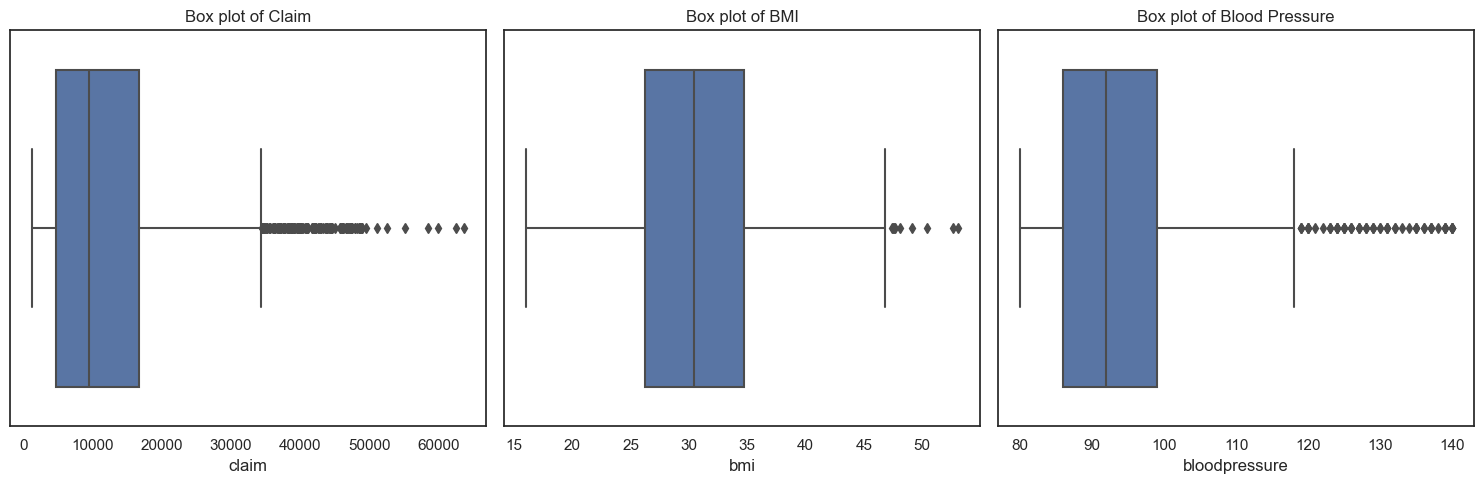

In [184]:
# Creating box plots to visually inspect outliers
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Box plot for 'claim' (target variable)
sns.boxplot(x=df_train['claim'], ax=axes[0])
axes[0].set_title('Box plot of Claim')

# Box plot for 'bmi' (independent variable)
sns.boxplot(x=df_train['bmi'], ax=axes[1])
axes[1].set_title('Box plot of BMI')

# Box plot for 'bloodpressure' (independent variable)
sns.boxplot(x=df_train['bloodpressure'], ax=axes[2])
axes[2].set_title('Box plot of Blood Pressure')

plt.tight_layout()
plt.show()

In [185]:
def calculate_iqr_outliers(data):
    """
    Calculate the IQR and identify outliers for a given dataset.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# Applying the IQR method to identify outliers
outliers_claim = calculate_iqr_outliers(df_train['claim'])
outliers_bmi = calculate_iqr_outliers(df_train['bmi'])
outliers_bloodpressure = calculate_iqr_outliers(df_train['bloodpressure'])

# Summarizing the number of outliers for each variable
iqr_outliers_summary = pd.DataFrame({
    'Variable': ['Claim', 'BMI', 'Blood Pressure'],
    'Number of Outliers (IQR Method)': [outliers_claim.sum(), outliers_bmi.sum(), outliers_bloodpressure.sum()]
})

iqr_outliers_summary

,Variable,Number of Outliers (IQR Method)
0,Claim,141
1,BMI,9
2,Blood Pressure,62


In [186]:
# Removing outliers based on Z-score method
outliers_combined = (outliers_claim | outliers_bmi | outliers_bloodpressure)
df_train_cleaned = df_train[~outliers_combined]

df_train_cleaned

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1190,1190,1191,29.0,female,37.5,106,Yes,2,No,northwest,33471.97
1191,1191,1192,29.0,male,30.7,94,No,0,Yes,northeast,33475.82
1193,1193,1194,46.0,male,31.9,82,Yes,0,Yes,northwest,33750.29
1195,1195,1196,59.0,female,30.4,80,No,0,Yes,northwest,33907.55


In [188]:
# Preparing the data again
region_dummies_no_outlier = pd.get_dummies(df_train_cleaned['region'])
df_train_cleaned = pd.concat([df_train_cleaned.drop('region', axis=1), region_dummies_no_outlier], axis=1)
df_train_cleaned = df_train_cleaned.drop(columns =['age', 'gender', 'diabetic', 'children', 'PatientID'])

# Encode smoker column 1 = Yes, 0 = No
label_encoder = LabelEncoder()
categorical_columns = ['smoker', 'northeast', 'northwest', 'southeast', 'southwest']
for column in categorical_columns:
    df_train_cleaned[column] = label_encoder.fit_transform(df_train_cleaned[column])


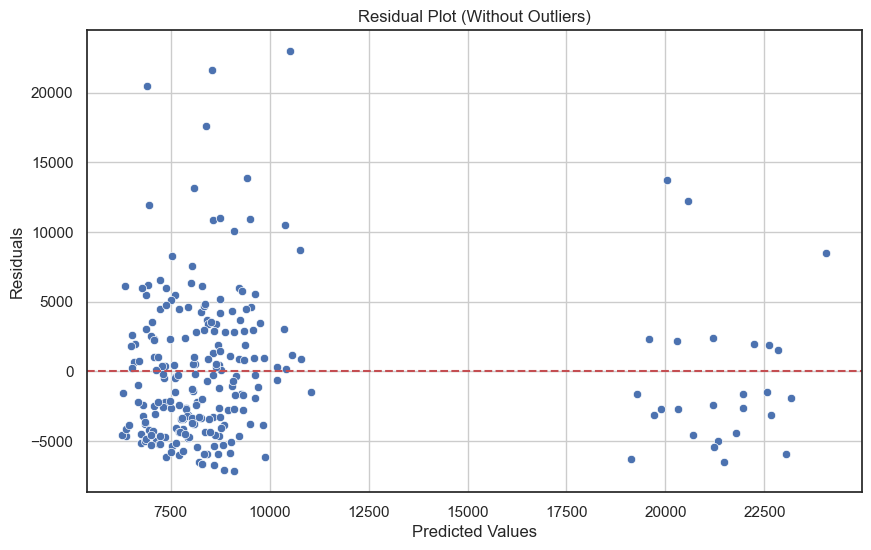


Mean Squared Error (MSE) no outliers: 27380953.86
R square no outliers: 0.40


In [189]:
X_no_outliers = df_train_cleaned[['bloodpressure', 'smoker', 'bmi']].copy()
y_no_outliers = df_train_cleaned['claim']

# Splitting the data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Fit the model on the training data without outliers
linear_regression_model_no_outliers = LinearRegression()
linear_regression_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the testing data
y_pred_no_outliers = linear_regression_model_no_outliers.predict(X_test_no_outliers)

# Calculate residuals
residuals_no_outliers = y_test_no_outliers - y_pred_no_outliers

# Create a residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_no_outliers, y=residuals_no_outliers)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Without Outliers)')
plt.grid(True)
plt.show()

# Evaluate the model
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
r2_no_outliers = r2_score(y_test_no_outliers, y_pred_no_outliers)


print("\nMean Squared Error (MSE) no outliers: {:.2f}".format(mse_no_outliers))
print("R square no outliers: {:.2f}".format(r2_no_outliers))


### Correlation Coefficient & Linearity

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Separate features (X) and target variable (y)
X = df_train_cleaned.drop(columns=['claim'])  # Drop patientID and claim columns for features
y = df_train_cleaned['claim']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate mean squared error to evaluate the model
mse = mean_squared_error(y_test, predictions)

# Print beautified output
print("\nMean Squared Error (MSE): {:.2f}".format(mse))
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print("{}: {:.2f}".format(feature, coef))
print("\nIntercept: {:.2f}".format(model.intercept_))

# Set the style of the heatmap
sns.set(style="white")  

# Create a figure and a set of subplots
plt.figure(figsize=(10, 8))

# Define your correlation matrix (assuming you have it defined somewhere in your code)
corr_matrix = df_train_cleaned.corr()

# Customize the heatmap appearance
sns.heatmap(corr_matrix,
            annot=True,  # Annotate each cell with the numeric value
            cmap="coolwarm",  # Set the color map (you can choose any color map you prefer)
            fmt=".2f",  # Format the annotations to two decimal places
            linewidths=.5,  # Width of the lines that divide each cell
            vmin=-1,  # Set the minimum value of the color scale
            vmax=1,   # Set the maximum value of the color scale
            square=True,  # Make the cells square-shaped
            cbar_kws={"shrink": 0.8},  # Shrink the color bar size for better visibility
            annot_kws={"size": 12}  # Set the font size of the annotations
           )

# Set the title and labels for the axes
plt.title("Correlation Matrix", fontsize=16)
plt.xlabel("X Axis Label", fontsize=14)  # Replace "X Axis Label" with your actual x-axis label
plt.ylabel("Y Axis Label", fontsize=14)  # Replace "Y Axis Label" with your actual y-axis label

# Display the heatmap
plt.show()


In [ ]:
# Set the style of the heatmap
sns.set(style="white")  

# Create a figure and a set of subplots
plt.figure(figsize=(10, 8))

# Define your correlation matrix (assuming you have it defined somewhere in your code)
corr_matrix = df_train_cleaned.corr()

# Customize the heatmap appearance
sns.heatmap(corr_matrix,
            annot=True,  # Annotate each cell with the numeric value
            cmap="coolwarm",  # Set the color map (you can choose any color map you prefer)
            fmt=".2f",  # Format the annotations to two decimal places
            linewidths=.5,  # Width of the lines that divide each cell
            vmin=-1,  # Set the minimum value of the color scale
            vmax=1,   # Set the maximum value of the color scale
            square=True,  # Make the cells square-shaped
            cbar_kws={"shrink": 0.8},  # Shrink the color bar size for better visibility
            annot_kws={"size": 12}  # Set the font size of the annotations
           )

# Set the title and labels for the axes
plt.title("Correlation Matrix", fontsize=16)
plt.xlabel("X Axis Label", fontsize=14)  # Replace "X Axis Label" with your actual x-axis label
plt.ylabel("Y Axis Label", fontsize=14)  # Replace "Y Axis Label" with your actual y-axis label

# Display the heatmap
plt.show()


In [ ]:
# Scatter plot for true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', edgecolors='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.grid(True)
plt.show()

## Data Transformation
Due to the suggestion above, doing the Data Transformation for stabilizing the variance and make the data more suitable for linear regression

In [ ]:

# Separate features (X) and target variable (y)
X = df_train_cleaned.drop(columns=['claim'])  # Drop claim columns for features
y = np.log1p(df_train_cleaned['claim'])  # Apply log transformation using log(1+x) to avoid log(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Revert log-transformed predictions to original scale for plotting
original_y_test = np.expm1(y_test)
original_predictions = np.expm1(predictions)

# Calculate mean squared error to evaluate the model
mse = mean_squared_error(original_y_test, original_predictions)

# Calculate R-squared
r_squared = r2_score(original_y_test, original_predictions)  # Calculate R-squared

# Scatter plot for true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(original_y_test, original_predictions, color='blue', edgecolors='k', alpha=0.6)
plt.plot([original_y_test.min(), original_y_test.max()], [original_y_test.min(), original_y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values after Log Transformation')
plt.grid(True)
plt.show()


In [ ]:
# Print beautified output
print("\nR Squared value: {:.2f}".format(r_squared))
print("Mean Squared Error (MSE) after log transformation: {:.2f}".format(mse))
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print("{}: {:.2f}".format(feature, coef))
print("\nIntercept: {:.2f}".format(model.intercept_))

In [ ]:
# Print the correlation matrix
corr_matrix = df_train_cleaned.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Independence
Using the Durbin-Watsons statistics

In [ ]:
df_train_cleaned

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Log transformation of the target variable
df_train_cleaned['claim'] = np.log(df_train_cleaned['claim'])

# Selecting features and target
X = df_train_cleaned.drop(columns=['claim'])  # Drop patientID and claim columns for features
y = df_train_cleaned['claim']

# Handling categorical variables (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the charges
y_pred = model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

# Calculate Durbin-Watson statistic
dw_statistic = durbin_watson(residuals)

print(f'Durbin-Watson Statistic: {dw_statistic}')

#### The Explanation
The Durbin-Watson statistic value of \(1.8686354311882818\) is close to 2, which is the ideal value suggesting no autocorrelation.

In more detail:

- A Durbin-Watson statistic value close to 2 suggests that there is no first-order linear autocorrelation in the residuals.
- A value between 0 and 2 indicates positive autocorrelation (i.e., the presence of a systematic pattern where a positive error for one observation increases the chance of a positive error for another observation).
- A value between 2 and 4 indicates negative autocorrelation (i.e., a positive error for one observation increases the chance of a negative error for another observation).

In your case, the Durbin-Watson statistic value of \(1.8686354311882818\) is very close to 2, indicating that the residuals from your regression model have little to no first-order linear autocorrelation. This is a good indication as it means the assumption of independent errors is nearly met, making the linear regression model more trustworthy.

In [ ]:
# Plot residuals against fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolors='k', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True)
plt.show()

# Normality

### Chi-Square

In [ ]:
import pandas as pd
from scipy.stats import chisquare

# Assuming df_train has been loaded already

variables_to_test = df_train_cleaned
for var in variables_to_test:
    observed_values = df_train_cleaned[var].value_counts().sort_index().values
    num_unique_values = len(df_train_cleaned[var].unique())
    expected_values = [len(df_train_cleaned) / num_unique_values] * num_unique_values
    if len(observed_values) == len(expected_values):  # Ensure lengths match before testing
        chi2, p = chisquare(observed_values, expected_values)
        print(f'Variable: {var}')
        print(f'Chi-Square: {chi2}')
        print(f'P-value: {p}')
        print('---' * 10)
    else:
        print(f"Skipped {var} due to shape mismatch between observed and expected values.")


### Q-Q plot of standardized residuals

In [ ]:
from scipy.stats import probplot

variables = df_train_cleaned
for var in variables:
    # Standardize the column values
    standardized_values = (df_train_cleaned[var] - np.mean(df_train_cleaned[var])) / np.std(df_train_cleaned[var])
    
    # Create Q-Q plot
    plt.figure(figsize=(8, 6))
    probplot(standardized_values, dist='norm', plot=plt)
    plt.title(f"Q-Q Plot of Standardized {var}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.show()


# Residual Homoscedasticity

In [ ]:
# Separate features (X) and target variable (y)
X = df_train_cleaned.drop(columns=['claim'])  # Drop patientID and claim columns for features
y = np.log1p(df_train_cleaned['claim'])  # Apply log transformation using log(1+x) to avoid log(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Revert log-transformed predictions to original scale for plotting
original_y_test = np.expm1(y_test)
original_predictions = np.expm1(predictions)

# Calculate mean squared error to evaluate the model
mse = mean_squared_error(original_y_test, original_predictions)

# Calculate residuals
residuals = y_test - predictions

# Plot residuals against fitted values
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='blue', edgecolors='k', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True)
plt.show()


###### Remove Outliers and Save the Data

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('input/insurance_data.csv')

In [ ]:
df

In [ ]:
total = df.isnull().sum()
percent = (total / len(df)) * 100
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_values)
df_train = df.drop('index',axis=1)

mean_age = np.mean(df['age'])
# Fill null values in the 'age' column with the mean age
df['age'].fillna(mean_age, inplace=True)

# Check if there are any missing values in the 'age' column after filling
missing_values = df['age'].isnull().sum()
print("Missing values in 'age' column after filling:", missing_values)

df.dropna(subset=['region'],inplace=True)

# Check if there are any missing values in the 'region' column after droping
missing_values = df['region'].isnull().sum()
print("Missing values in 'region' column after filling:", missing_values)

df.describe()

In [ ]:
df

In [ ]:
region_dummies = pd.get_dummies(df['region'])

df = pd.concat([df.drop('region', axis=1), region_dummies], axis=1)

# Encode smoker column 1 = Yes, 0 = No
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'smoker', 'diabetic', 'northeast', 'northwest', 'southeast', 'southwest']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [ ]:
df

In [ ]:
def calculate_iqr_outliers(data):
    """
    Calculate the IQR and identify outliers for a given dataset.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# Applying the IQR method to identify outliers
outliers_claim = calculate_iqr_outliers(df['claim'])
outliers_bmi = calculate_iqr_outliers(df['bmi'])
outliers_bloodpressure = calculate_iqr_outliers(df['bloodpressure'])

# Summarizing the number of outliers for each variable
iqr_outliers_summary = pd.DataFrame({
    'Variable': ['Claim', 'BMI', 'Blood Pressure'],
    'Number of Outliers (IQR Method)': [outliers_claim.sum(), outliers_bmi.sum(), outliers_bloodpressure.sum()]
})

iqr_outliers_summary

In [ ]:
outliers_combined = (outliers_claim | outliers_bmi | outliers_bloodpressure)
df_train_cleaned = df[~outliers_combined]

df_train_cleaned


In [ ]:
# Save the cleaned data to a new CSV file
df_train_cleaned.to_csv('input/cleaned_data.csv', index=False)

In [ ]:
df = pd.read_csv('cleaned_data.csv')

In [ ]:
df